<h1 align="left"> Use case: Social </h1>

The objective of this assignment is to evaluate the candidate's technical skills and their approach to a Data Science problem. Specifically, the task is to **identify** and **characterize** *N* types of people who answered an interview.

**Dataset:**

Inside the **data** folder, you will find the social.txt file, which contains all the variables described below. 

**Assignment:**

The request of this assignment is to build an unsupervised model with satisfactory performance, demonstrating all the typical steps that should be addressed in a Data Science project: from data cleaning and preparation to testing the performance of the constructed model.

The completed notebook should be properly commented and should be delivered through sharing a personal accessible GitHub repository that allows for its reproduction.

### Dataset name: *social.txt*

Variables:
- There are 20 variables that indicate the personality characteristics of the respondents. The responses ranged from 1 to 6, but in this case they have already been standardized.
- **gender**: gender of the respondents
    - 0: MALE
    - 1: FEMALE
- **education**: high education level of the respondents
    - 0: No Master's or equivalent
    - 1: at least Master's or equivalent level
- **age**: age of the respondents

In [ ]:
import pandas as pd
import numpy as np
import os
import pickle
from pathlib import Path
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# LOADING DATA

In [410]:
PATH_DF = Path(r".\data\social.txt")
df = pd.read_csv(PATH_DF, delimiter="\t")
print("Shape of the dataframe:",df.shape)
print("Columns of the dataframe:", df.columns.tolist())

Shape of the dataframe: (2236, 23)
Columns of the dataframe: ['Indifferent', 'Inquire_others', 'Comfort_others', 'Love_child', 'People_ease', 'Exacting_work', 'Pedantic', 'Like_Schedule', 'Superficial', 'Waste_time', 'Dont_talk', 'Difficult_approach', 'Captivate_People', 'Sociable', 'Take_charge', 'Angry', 'Irritated', 'Mood_swings', 'Feel_blue', 'Panic', 'gender', 'education', 'age']


In [411]:
df.head()

,Indifferent,Inquire_others,Comfort_others,Love_child,People_ease,Exacting_work,Pedantic,Like_Schedule,Superficial,Waste_time,...,Sociable,Take_charge,Angry,Irritated,Mood_swings,Feel_blue,Panic,gender,education,age
61623,2.611134,1.007784,0.287544,0.863604,0.330479,1.175588,1.219267,1.302954,-1.101318,-0.156706,...,0.390186,1.188915,0.058603,0.986674,-0.750798,-0.753116,0.029503,1,0,21
61629,1.174320,-1.585318,-2.814740,0.172968,-2.854658,-1.290279,-1.831118,-0.250862,-0.367543,0.456945,...,-1.665876,-2.570154,1.976204,-0.316458,-0.750798,1.810001,0.646033,0,0,19
61634,1.174320,-0.720950,0.287544,0.863604,0.330479,-0.468324,-1.068522,0.526046,0.366231,-0.770357,...,0.390186,-0.314713,0.058603,-0.316458,0.502026,-0.753116,0.029503,0,0,21
61640,1.174320,0.143417,-2.039169,-1.898940,-2.854658,0.353632,0.456671,0.526046,-0.367543,-0.770357,...,1.075540,0.437101,-0.580597,0.335108,-0.750798,-0.753116,0.029503,0,0,17
61661,-0.980902,0.143417,1.063115,0.172968,1.126764,-0.468324,-1.068522,-1.804678,1.100005,1.070596,...,0.390186,-1.818340,-0.580597,-0.968024,-0.750798,-0.753116,-0.587027,0,1,68


In [412]:
df.index.nunique()

2236

# EDA

In [413]:
df.isna().sum()

Indifferent           0
Inquire_others        0
Comfort_others        0
Love_child            0
People_ease           0
Exacting_work         0
Pedantic              0
Like_Schedule         0
Superficial           0
Waste_time            0
Dont_talk             0
Difficult_approach    0
Captivate_People      0
Sociable              0
Take_charge           0
Angry                 0
Irritated             0
Mood_swings           0
Feel_blue             0
Panic                 0
gender                0
education             0
age                   0
dtype: int64

### Non sono presenti valori mancanti

In [414]:
df.describe()

,Indifferent,Inquire_others,Comfort_others,Love_child,People_ease,Exacting_work,Pedantic,Like_Schedule,Superficial,Waste_time,...,Sociable,Take_charge,Angry,Irritated,Mood_swings,Feel_blue,Panic,gender,education,age
count,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,...,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2236.000000,2236.000000,2236.000000
mean,-3.177740e-18,-1.178942e-15,3.002965e-16,6.252204e-16,1.027999e-15,-6.577922e-16,4.830165e-16,-8.103238e-16,8.357457e-16,4.925497e-17,...,5.688155e-16,-6.021818e-16,-2.558081e-16,1.843089e-16,-7.992017e-16,-7.022806e-16,-1.243291e-15,0.671288,0.317531,29.510286
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.469850,0.465620,10.664222
min,-9.809022e-01,-3.314053e+00,-2.814740e+00,-2.589576e+00,-2.854658e+00,-2.934190e+00,-2.593714e+00,-2.581587e+00,-1.101318e+00,-1.384009e+00,...,-2.351230e+00,-2.570154e+00,-1.219798e+00,-1.619590e+00,-1.377210e+00,-1.393896e+00,-1.203558e+00,0.000000,0.000000,3.000000
25%,-9.809022e-01,-7.209505e-01,-4.880270e-01,-5.176681e-01,-4.658049e-01,-4.683236e-01,-3.059253e-01,-2.508621e-01,-1.101318e+00,-7.703573e-01,...,-2.951681e-01,-3.147127e-01,-5.805974e-01,-9.680244e-01,-7.507979e-01,-7.531164e-01,-5.870274e-01,0.000000,0.000000,21.000000
50%,-2.624950e-01,1.434170e-01,2.875440e-01,1.729679e-01,3.304793e-01,3.536321e-01,4.566710e-01,5.260460e-01,-3.675435e-01,-1.567061e-01,...,3.901858e-01,4.371010e-01,5.860289e-02,3.351078e-01,-1.243859e-01,-1.123370e-01,2.950302e-02,1.000000,0.000000,26.000000
75%,4.559123e-01,1.007784e+00,1.063115e+00,8.636039e-01,1.126764e+00,3.536321e-01,4.566710e-01,5.260460e-01,1.100005e+00,1.070596e+00,...,1.075540e+00,4.371010e-01,6.978032e-01,9.866739e-01,5.020261e-01,5.284424e-01,6.460335e-01,1.000000,1.000000,36.000000
max,2.611134e+00,1.007784e+00,1.063115e+00,8.636039e-01,1.126764e+00,1.175588e+00,1.219267e+00,1.302954e+00,2.567554e+00,1.684248e+00,...,1.075540e+00,1.188915e+00,1.976204e+00,1.638240e+00,1.754850e+00,1.810001e+00,1.879094e+00,1.000000,1.000000,86.000000


### Le 20 variabili riguardanti la personalità degli intervistati sono effettivamente standardizzate. Notiamo che l'unica variabile con una scala diversa è l'età, che pertanto sarà standardizzata. 
### Notiamo anche che l'età minima degli intervistati è 3, pertanto si va ad indagare sulla distribuzione dell'età degli intervistati.
### Inoltre si va a capire se l'età e il grado di istruzione degli intervistati è coerente.

<Axes: xlabel='age', ylabel='Count'>

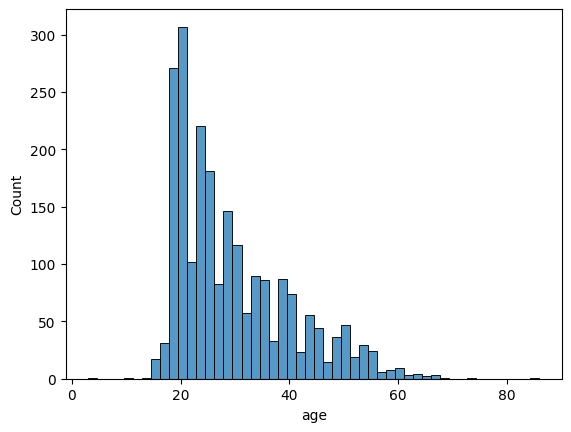

In [415]:
sns.histplot(df, x='age', bins=50)

### Considerando che:
- per conseguire un Master è necessario aver conseguito almeno la laurea triennale (per cui sono necessari almeno 3 anni, a meno di casi particolari);
- la durata minima di un Master è 1 anno;
- l'università si inizia non prima dei 18 anni (a meno di casi particolari, come la "primina")
### si va a verificare il grado di istruzione dei soggetti con al massimo 21 anni, in quanto ci aspettiamo che non abbiano conseguito alcun Master.

<Axes: xlabel='age', ylabel='Count'>

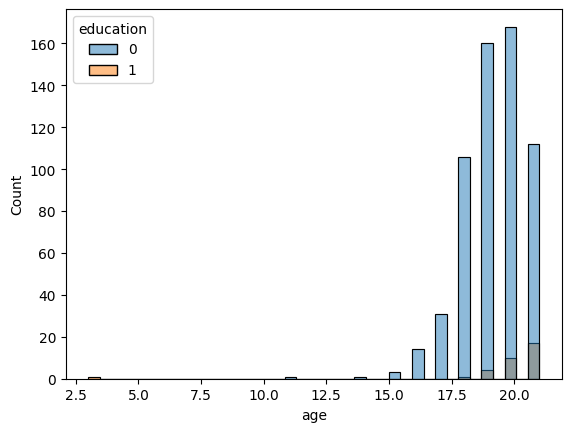

In [416]:
mask_age_le_21 = df['age'] <= 21
df_age_le_21 = df[mask_age_le_21]
sns.histplot(df_age_le_21, x='age', hue='education')

In [417]:
df_age_le_21['education'].value_counts()

education
0    596
1     33
Name: count, dtype: int64

In [418]:
df_age_le_21.loc[df_age_le_21['education'] == 1, 'age'].value_counts()

age
21    17
20    10
19     4
18     1
3      1
Name: count, dtype: int64

### 33 soggetti con al massimo 21 anni risultano aver conseguito almeno il Master: 
- 17 di loro hanno 21 anni
- 10 di loro hanno 20 anni
- 4 di loro hanno 19 anni
- 1 di loro ha 18 anni
- 1 di loro ha 3 anni
### si modifica il valore di 'education' in 0 per tutti tranne che per il soggetto con 3 anni, in cui si modifica l'età in 30, in quanto si ipotizza che ci sia stato un errore di battitura. 
### Nella realtà sarebbe da capire quanti di quelli con 20 anni hanno effettuato la "primina" e conseguito la laurea triennale in anticipo e quanti di quelli con 21 anni hanno conseguito la laurea triennale in anticipo o effettuato la "primina".

In [419]:
mask_age_gt_3 = df['age'] > 3
mask_education_1 = df['education'] == 1

df.loc[mask_age_gt_3 & mask_age_le_21 & mask_education_1, 'education'] = 0
df.loc[~mask_age_gt_3, 'age'] = 30

In [420]:
df.describe()

,Indifferent,Inquire_others,Comfort_others,Love_child,People_ease,Exacting_work,Pedantic,Like_Schedule,Superficial,Waste_time,...,Sociable,Take_charge,Angry,Irritated,Mood_swings,Feel_blue,Panic,gender,education,age
count,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,...,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2236.000000,2236.000000,2236.000000
mean,-3.177740e-18,-1.178942e-15,3.002965e-16,6.252204e-16,1.027999e-15,-6.577922e-16,4.830165e-16,-8.103238e-16,8.357457e-16,4.925497e-17,...,5.688155e-16,-6.021818e-16,-2.558081e-16,1.843089e-16,-7.992017e-16,-7.022806e-16,-1.243291e-15,0.671288,0.303220,29.522361
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.469850,0.459752,10.649466
min,-9.809022e-01,-3.314053e+00,-2.814740e+00,-2.589576e+00,-2.854658e+00,-2.934190e+00,-2.593714e+00,-2.581587e+00,-1.101318e+00,-1.384009e+00,...,-2.351230e+00,-2.570154e+00,-1.219798e+00,-1.619590e+00,-1.377210e+00,-1.393896e+00,-1.203558e+00,0.000000,0.000000,11.000000
25%,-9.809022e-01,-7.209505e-01,-4.880270e-01,-5.176681e-01,-4.658049e-01,-4.683236e-01,-3.059253e-01,-2.508621e-01,-1.101318e+00,-7.703573e-01,...,-2.951681e-01,-3.147127e-01,-5.805974e-01,-9.680244e-01,-7.507979e-01,-7.531164e-01,-5.870274e-01,0.000000,0.000000,21.000000
50%,-2.624950e-01,1.434170e-01,2.875440e-01,1.729679e-01,3.304793e-01,3.536321e-01,4.566710e-01,5.260460e-01,-3.675435e-01,-1.567061e-01,...,3.901858e-01,4.371010e-01,5.860289e-02,3.351078e-01,-1.243859e-01,-1.123370e-01,2.950302e-02,1.000000,0.000000,26.000000
75%,4.559123e-01,1.007784e+00,1.063115e+00,8.636039e-01,1.126764e+00,3.536321e-01,4.566710e-01,5.260460e-01,1.100005e+00,1.070596e+00,...,1.075540e+00,4.371010e-01,6.978032e-01,9.866739e-01,5.020261e-01,5.284424e-01,6.460335e-01,1.000000,1.000000,36.000000
max,2.611134e+00,1.007784e+00,1.063115e+00,8.636039e-01,1.126764e+00,1.175588e+00,1.219267e+00,1.302954e+00,2.567554e+00,1.684248e+00,...,1.075540e+00,1.188915e+00,1.976204e+00,1.638240e+00,1.754850e+00,1.810001e+00,1.879094e+00,1.000000,1.000000,86.000000


In [421]:
cat_features = ['gender', 'education']
num_features = [c for c in df.columns if c not in cat_features]
num_features

['Indifferent',
 'Inquire_others',
 'Comfort_others',
 'Love_child',
 'People_ease',
 'Exacting_work',
 'Pedantic',
 'Like_Schedule',
 'Superficial',
 'Waste_time',
 'Dont_talk',
 'Difficult_approach',
 'Captivate_People',
 'Sociable',
 'Take_charge',
 'Angry',
 'Irritated',
 'Mood_swings',
 'Feel_blue',
 'Panic',
 'age']

In [422]:
for c in num_features:
    df[c] = df[c]
    print(f"Column: {c}")
    print("Absolute frequence:")
    print(df[c].value_counts(normalize=False, ascending=False))
    print("Relative frequence:")
    print(df[c].value_counts(normalize=True, ascending=False))
    print("-" * 20)

Column: Indifferent
Absolute frequence:
Indifferent
-0.980902    767
-0.262495    666
 0.455912    315
 1.174320    260
 1.892727    163
 2.611134     65
Name: count, dtype: int64
Relative frequence:
Indifferent
-0.980902    0.343023
-0.262495    0.297853
 0.455912    0.140877
 1.174320    0.116279
 1.892727    0.072898
 2.611134    0.029070
Name: proportion, dtype: float64
--------------------
Column: Inquire_others
Absolute frequence:
Inquire_others
 0.143417    830
 1.007784    725
-0.720950    433
-1.585318    115
-2.449685     99
-3.314053     34
Name: count, dtype: int64
Relative frequence:
Inquire_others
 0.143417    0.371199
 1.007784    0.324240
-0.720950    0.193649
-1.585318    0.051431
-2.449685    0.044275
-3.314053    0.015206
Name: proportion, dtype: float64
--------------------
Column: Comfort_others
Absolute frequence:
Comfort_others
 0.287544    804
 1.063115    618
-0.488027    456
-1.263598    154
-2.039169    133
-2.814740     71
Name: count, dtype: int64
Relative 

In [423]:
for c in cat_features:
    df[c] = df[c].astype("category")
    print(f"Column: {c}")
    print("Absolute frequence:")
    print(df[c].value_counts(normalize=False, ascending=False))
    print("Relative frequence:")
    print(df[c].value_counts(normalize=True, ascending=False))
    print("-" * 20)

Column: gender
Absolute frequence:
gender
1    1501
0     735
Name: count, dtype: int64
Relative frequence:
gender
1    0.671288
0    0.328712
Name: proportion, dtype: float64
--------------------
Column: education
Absolute frequence:
education
0    1558
1     678
Name: count, dtype: int64
Relative frequence:
education
0    0.69678
1    0.30322
Name: proportion, dtype: float64
--------------------


### Il 67% degli intervistati sono donne mentre il 33% uomini.
### Per quanto riguarda il grado di istruzione, il 70% degli intervistati ha un grado di istruzione inferiore al Master, mentre il restante 30% ha un grado di istruzione almeno pari al Master.

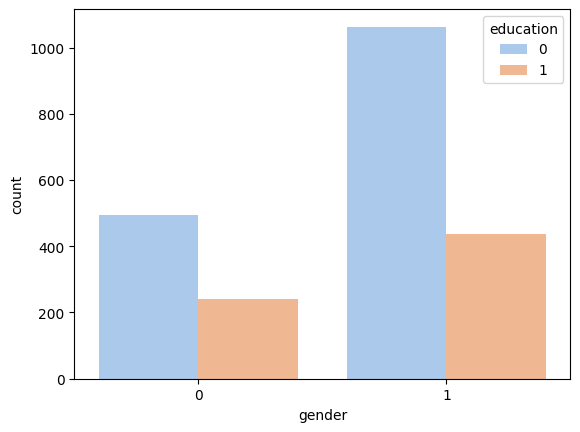

In [424]:
sns.countplot(data=df, x='gender', hue='education', palette = "pastel")
plt.show()

### Notiamo come, sia tra le donne che tra gli uomini, i soggetti con un grado di istruzione inferiore al Master sono la metà rispetto ai soggetti con almeno il Master

In [425]:
corr = df[num_features].corr()

<Axes: >

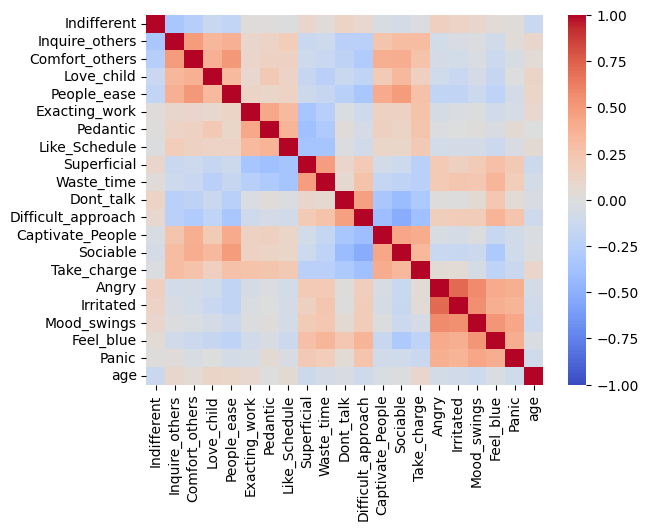

In [426]:
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1)

In [427]:
threshold = 0.4

high_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

high_corr_pairs = high_corr_pairs[np.abs(high_corr_pairs['Correlation']) > threshold].sort_values(by='Correlation', ascending=False)

print(f"Variables with (absolute) correlation greater than {threshold}:\n",high_corr_pairs)

Variables with (absolute) correlation greater than 0.4:
              Variable 1          Variable 2  Correlation
195               Angry           Irritated     0.711571
196               Angry         Mood_swings     0.565886
200           Irritated         Mood_swings     0.547733
204         Mood_swings           Feel_blue     0.519055
40       Comfort_others         People_ease     0.502886
82          People_ease            Sociable     0.484856
20       Inquire_others      Comfort_others     0.484847
132         Superficial          Waste_time     0.484126
155           Dont_talk  Difficult_approach     0.465697
174    Captivate_People            Sociable     0.431386
205         Mood_swings               Panic     0.431172
90        Exacting_work            Pedantic     0.426832
81          People_ease    Captivate_People     0.411666
197               Angry           Feel_blue     0.407743
175    Captivate_People         Take_charge     0.400116
165  Difficult_approach    Capt

### Notiamo come, in generale non ci siano correlazioni molto elevate (> 0.75) tra le variabili. Ci sono delle correlazioni non banali (comprese tra 0.4 e 0.7 in valore assoluto) che uno poteva aspettarsi: correlazione positiva tra 'Angry', 'Irritated' e 'Mood_swings', tra 'Comfort_others', 'People_ease' e 'Sociable', tra 'Dont_talk' e 'Difficult_approach'; correlazione negativa tra 'Difficult_approach' e 'Captivate_People', tra 'Dont_talk' e 'Sociable', tra 'Difficult_approach' e 'Sociable'. 

### Considerando che nessuna correlazione risulta essere particolarmente elevata ed essendo interessati all'interpretabilità di ciascun clustering, si decide di effettuare il clustering con le variabili originali. L'alternativa sarebbe stata quella di applicare una tecnica di riduzione della dimensionalità (come la PCA) ed effettuare il clustering sul nuovo spazio, rischiando di perdere l'interpretabilità dei cluster.

### Considerando che si hanno a disposizione: 
- 20 variabili ordinali standardizzate che possono essere trattate come numeriche;
- 1 variabile numerica ('age') non standardizzata;
- 2 variabili dicotomiche ('education' e 'gender') che possono essere considerate numeriche
### si decide di effettuare un clustering model-based, in cui si va ad ipotizzare che le variabili all'interno di ciascun cluster siano distribuite come una Normale con una matrice di covarianza potenzialmente diversa tra i diversi cluster. 
### Trattandosi di un metodo model-based, la scelta del numero ottimale di clusters viene effettuata sulla base dei criteri di informazione (AIC e BIC), i quali devono essere minimizzati.

### Prima di procedere con il clustering, si effettua la standardizzazione dell'età.

In [428]:
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])

In [429]:
for c in cat_features:
    df[c] = df[c].astype("float")
df.dtypes

Indifferent           float64
Inquire_others        float64
Comfort_others        float64
Love_child            float64
People_ease           float64
Exacting_work         float64
Pedantic              float64
Like_Schedule         float64
Superficial           float64
Waste_time            float64
Dont_talk             float64
Difficult_approach    float64
Captivate_People      float64
Sociable              float64
Take_charge           float64
Angry                 float64
Irritated             float64
Mood_swings           float64
Feel_blue             float64
Panic                 float64
gender                float64
education             float64
age                   float64
dtype: object

# GAUSSIAN MIXTURE MODEL (GMM) ON DF

### Poichè è ragionevole ipotizzare, alla luce della matrice di correlazione vista in precedenza, che all'interno di ciascun cluster ci sia correlazione tra le variabili, e per un principio di parsimonia in termini di numero di parametri da stimare, si effettua un clustering con Gaussian Mixture Model con tipo di covarianza "tied", ovvero si ipotizza una matrice di covarianza identica tra tutti i cluster.

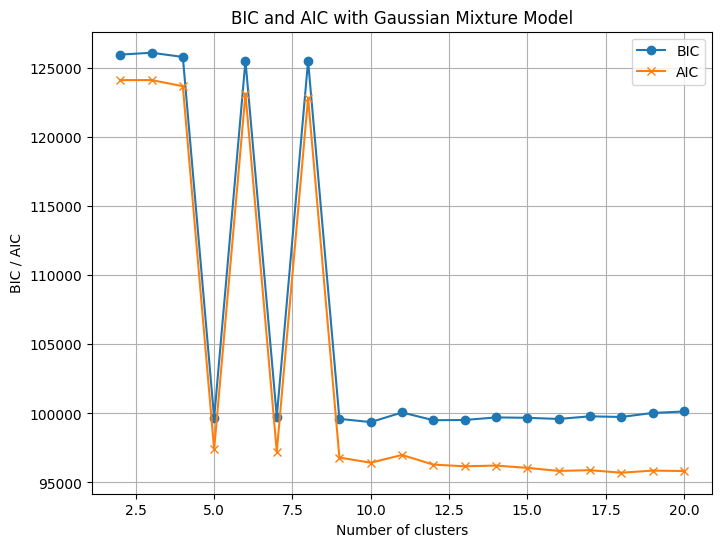

In [430]:
bic_tied = []
aic_tied = []
for k in range(2, 21):  
    gmm = GaussianMixture(n_components=k, random_state=42, max_iter = 2000, covariance_type="tied", n_init = 10)
    gmm.fit(df)  
    bic_tied.append(gmm.bic(df))
    aic_tied.append(gmm.aic(df))


plt.figure(figsize=(8, 6))
plt.plot(range(2, 21), bic_tied, marker='o', label='BIC')
plt.plot(range(2, 21), aic_tied, marker='x', label='AIC')
plt.title('BIC and AIC with Gaussian Mixture Model')
plt.xlabel('Number of clusters')
plt.ylabel('BIC / AIC')
plt.legend()
plt.grid(True)
plt.show()

### Notiamo come, sia per l'AIC che per il BIC, si ha una decrescita rilevante in corrispondenza di 5 cluster. Pertanto, si seleziona questo come valore ottimale di cluster.

In [434]:
optimal_k = 5
print(f"Optimal number of cluster: {optimal_k}")

gmm_optimal = GaussianMixture(n_components=optimal_k, random_state=42, max_iter=2000, covariance_type="tied", n_init=10)
gmm_optimal.fit(df)
clusters = gmm_optimal.predict(df)

Optimal number of cluster: 5


In [435]:
out_folder = ".\clusters"
if not os.path.exists(out_folder):
    os.makedirs(out_folder)

file_name =  "clusters.sav"
FULL_OUT = f"{out_folder}\{file_name}"
with open(FULL_OUT, 'wb') as f:
    pickle.dump(clusters, f)

In [436]:
with open(FULL_OUT, 'rb') as f:
    clusters = pickle.load(f)

C:\Users\dcugnigni\AppData\Local\Temp\ipykernel_17596\2816332321.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', num_clusters)


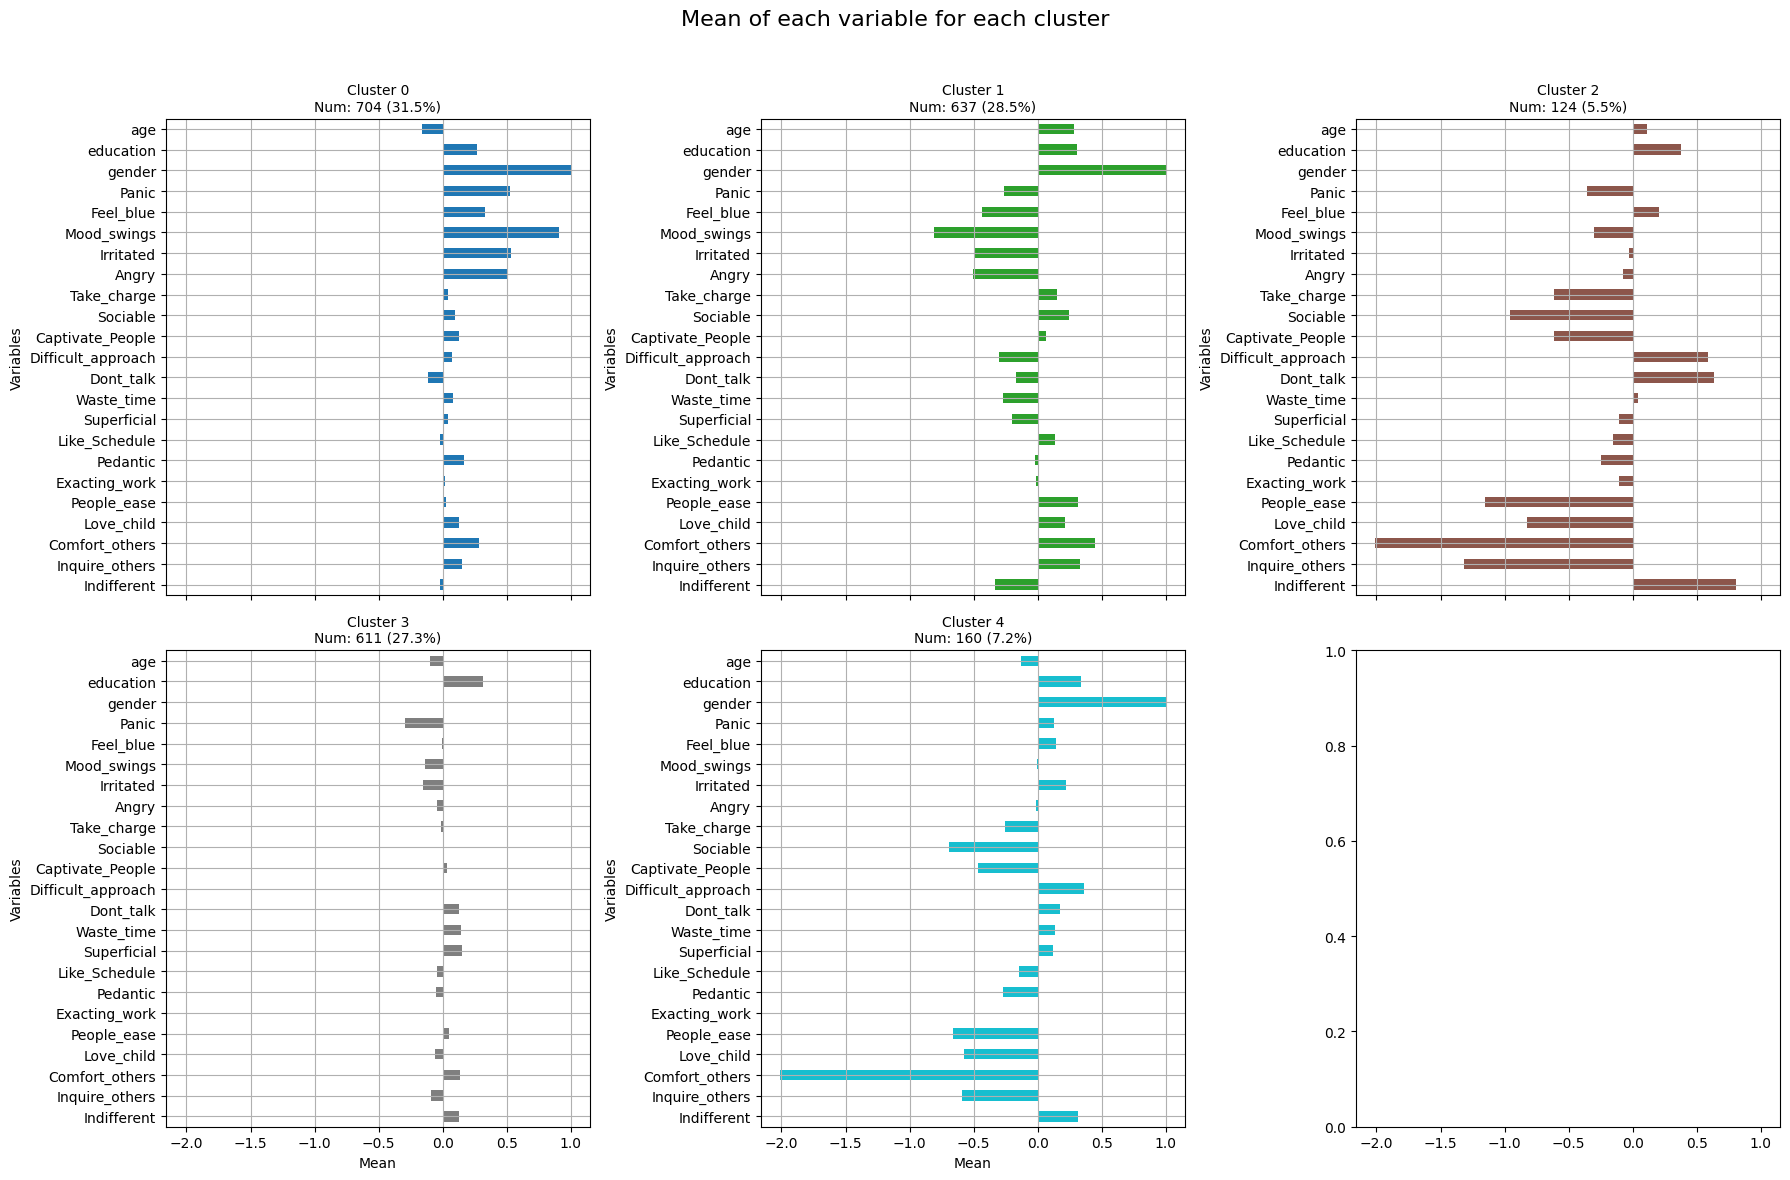

In [439]:
df['Cluster'] = clusters
cluster_means = df.groupby('Cluster').mean()

total_samples = df.shape[0]
cluster_sizes = df['Cluster'].value_counts()

num_clusters = optimal_k

fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharex=True) 
axes = axes.flatten()

colors = cm.get_cmap('tab10', num_clusters) 

for i, cluster in enumerate(cluster_means.index):
    ax = axes[i]
    
    size = cluster_sizes[cluster]
    percentage = (size / total_samples) * 100
    
    cluster_means.loc[cluster].plot(
        kind='barh', 
        ax=ax, 
        color=colors(i), 
        grid=True
    )
    
    ax.set_title(f'Cluster {cluster}\nNum: {size} ({percentage:.1f}%)', fontsize=10)
    ax.set_xlabel('Mean')
    ax.set_ylabel('Variables')
    ax.tick_params(axis='y', labelsize=10)

# for i in range(num_clusters, len(axes)):
#     fig.delaxes(axes[i])

plt.suptitle('Mean of each variable for each cluster', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Notiamo che:
- nel primo cluster (31.5%) sono presenti intervistati di genere femminile, giovani, sia senza che con almeno il Master come livello di istruzione, irascibili, con sbalzi d'umore, che si impanicano e si arrabbiano;
- nel secondo cluster (28.5%) sono presenti intervistati di genere maschile, anziani, sia senza che con almeno il Master come livello di istruzione, non irascibili, senza sbalzi d'umore, che non si impanicano, non si arrabbiano, confortano gli altri e non sono indifferenti;
- nel terzo cluster (5.5%) sono presenti intervistati di genere maschile, sia senza che con almeno il Master come livello di istruzione, che non confortano e non chiedono agli altri, che non amano i bambini, sono asociali, indifferenti e non parlano;
- nel quarto cluster (27.3%) sono presenti intervistati di genere maschile, sia senza che con almeno il Master come livello di istruzione, in cui non c'è alcun aspetto caratteriale che prevale sugli altri;
- nel quinto cluster (7.2%) sono presenti intervistati di genere femminile, sia senza che con almeno il Master come livello di istruzione, che non confortano e non chiedono agli altri, che non amano i bambini, sono asociali, indifferenti e non parlano; 
